# Intro Finance

___

## 1. Stocks

From [Investopedia](https://www.investopedia.com/terms/s/stock.asp)
- A stock is a form of security that indicates the holder has proportionate ownership in the issuing corporation.
- Corporations issue (sell) stock to raise funds to operate their businesses. There are two main types of stock: common and preferred.
- Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and they are the foundation of nearly every portfolio.
- Historically, they have outperformed most other investments over the long run.

Stock are quoted on exchanges. The current market price is referred to as the **spot price** of the stock.

In [ ]:
%config InlineBackend.figure_format = "retina"

import os
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import numpy as np
import pandas_datareader as pdr

register_matplotlib_converters()
sns.set()
api_key = os.environ["TIINGO_API_KEY"]

In [2]:
goog = pdr.get_data_tiingo("GOOG", api_key=api_key)
goog.index = goog.index.get_level_values("date")

In [3]:
goog.iloc[:-10:-1]

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
date,,,,,,,,,,,,
2019-04-04 00:00:00+00:00,1215.00,1215.67,1204.13,1205.94,950747,1215.00,0.0,1215.67,1204.13,1205.94,1.0,950747
2019-04-03 00:00:00+00:00,1205.92,1216.30,1200.50,1207.48,1017838,1205.92,0.0,1216.30,1200.50,1207.48,1.0,1017838
2019-04-02 00:00:00+00:00,1200.49,1201.35,1185.71,1195.32,827973,1200.49,0.0,1201.35,1185.71,1195.32,1.0,827973
2019-04-01 00:00:00+00:00,1194.43,1196.66,1182.00,1184.10,1252757,1194.43,0.0,1196.66,1182.00,1184.10,1.0,1252757
2019-03-29 00:00:00+00:00,1173.31,1178.99,1162.88,1174.90,1269979,1173.31,0.0,1178.99,1162.88,1174.90,1.0,1269979
2019-03-28 00:00:00+00:00,1168.49,1171.57,1159.43,1171.54,1012430,1168.49,0.0,1171.57,1159.43,1171.54,1.0,1012430
2019-03-27 00:00:00+00:00,1173.02,1187.56,1159.37,1185.50,1400240,1173.02,0.0,1187.56,1159.37,1185.50,1.0,1400240
2019-03-26 00:00:00+00:00,1184.62,1202.83,1176.72,1198.53,1901156,1184.62,0.0,1202.83,1176.72,1198.53,1.0,1901156
2019-03-25 00:00:00+00:00,1193.00,1206.40,1187.04,1196.93,1496843,1193.00,0.0,1206.40,1187.04,1196.93,1.0,1496843


- `close` is the end-of-day (EOD) price
- `open` is the first price for the day
- `volume` is the number of stocks traded
- `adj*` columns are adjusted prices for stock splits/dividend disbursements

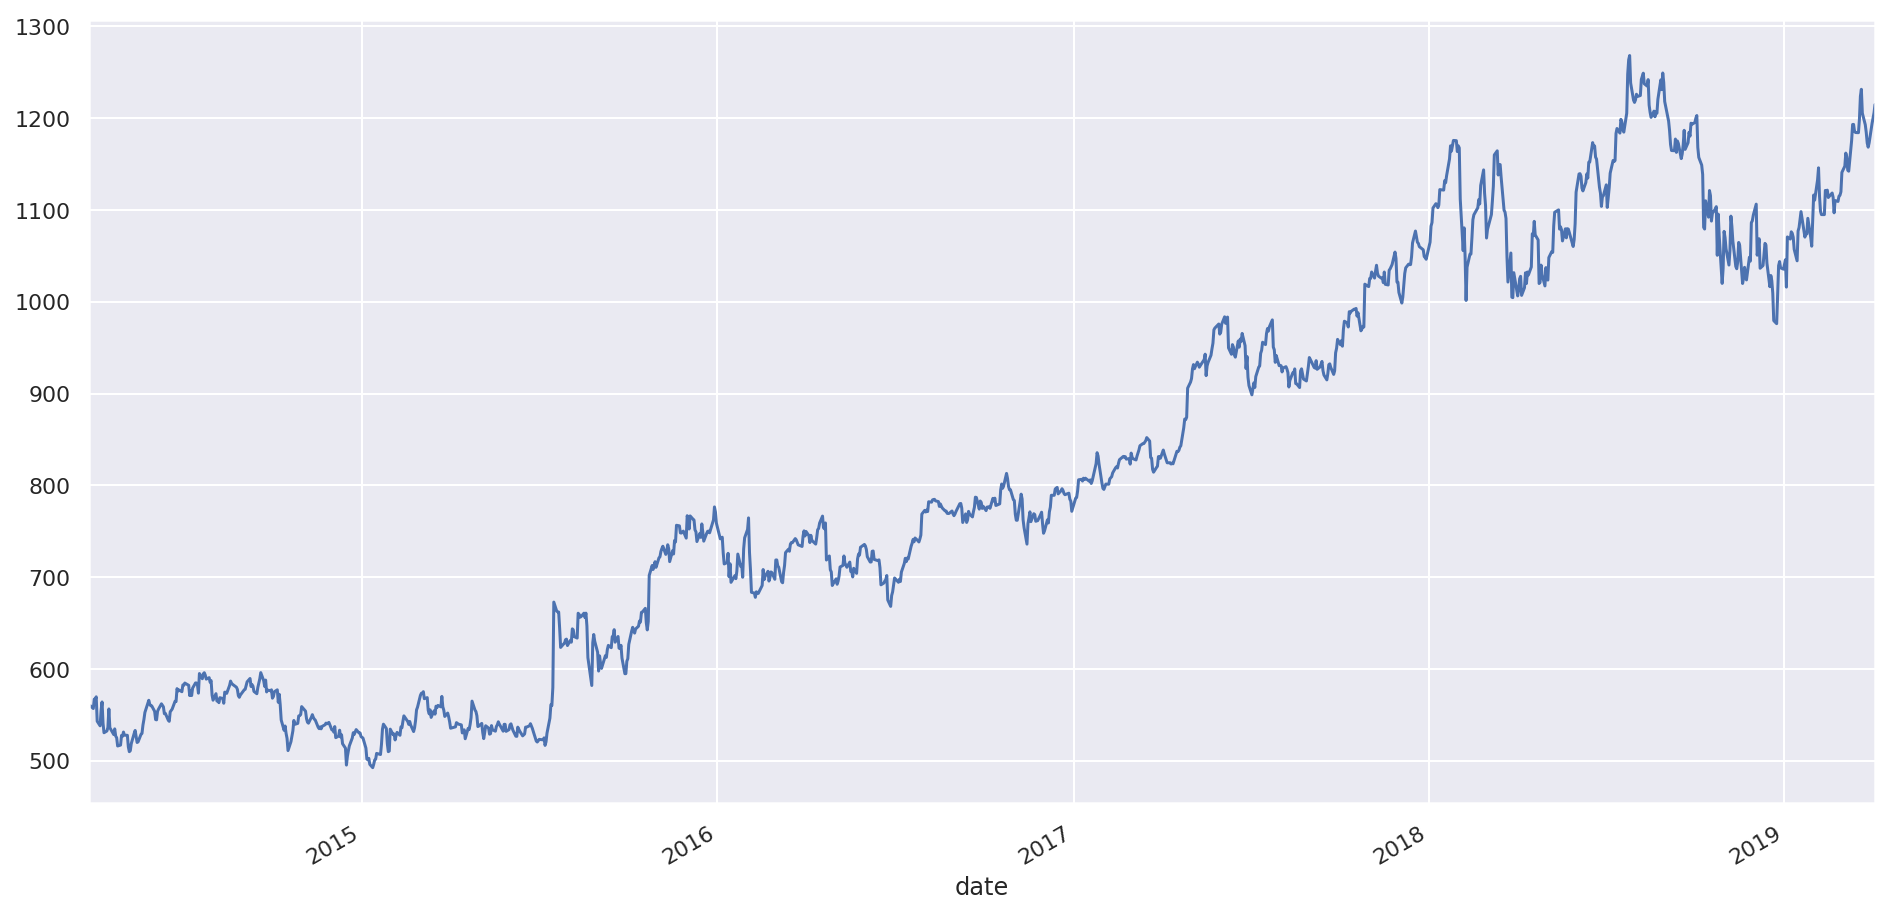

In [4]:
goog["close"].plot(figsize=(16,8))

In [5]:
tickers = ["AAPL", "MSFT", "TSLA", "IBM", "GOOG"]
symbols = pdr.get_data_tiingo(tickers, api_key=api_key)

In [6]:
close_data = symbols["adjClose"].unstack(level="symbol")
close_data.tail()

symbol,AAPL,GOOG,IBM,MSFT,TSLA
date,,,,,
2019-03-29 00:00:00+00:00,189.95,1173.31,141.10,117.94,279.86
2019-04-01 00:00:00+00:00,191.24,1194.43,143.30,119.02,289.18
2019-04-02 00:00:00+00:00,194.02,1200.49,143.00,119.19,285.88
2019-04-03 00:00:00+00:00,195.35,1205.92,143.63,119.97,291.81
2019-04-04 00:00:00+00:00,195.69,1215.00,142.78,119.36,267.78


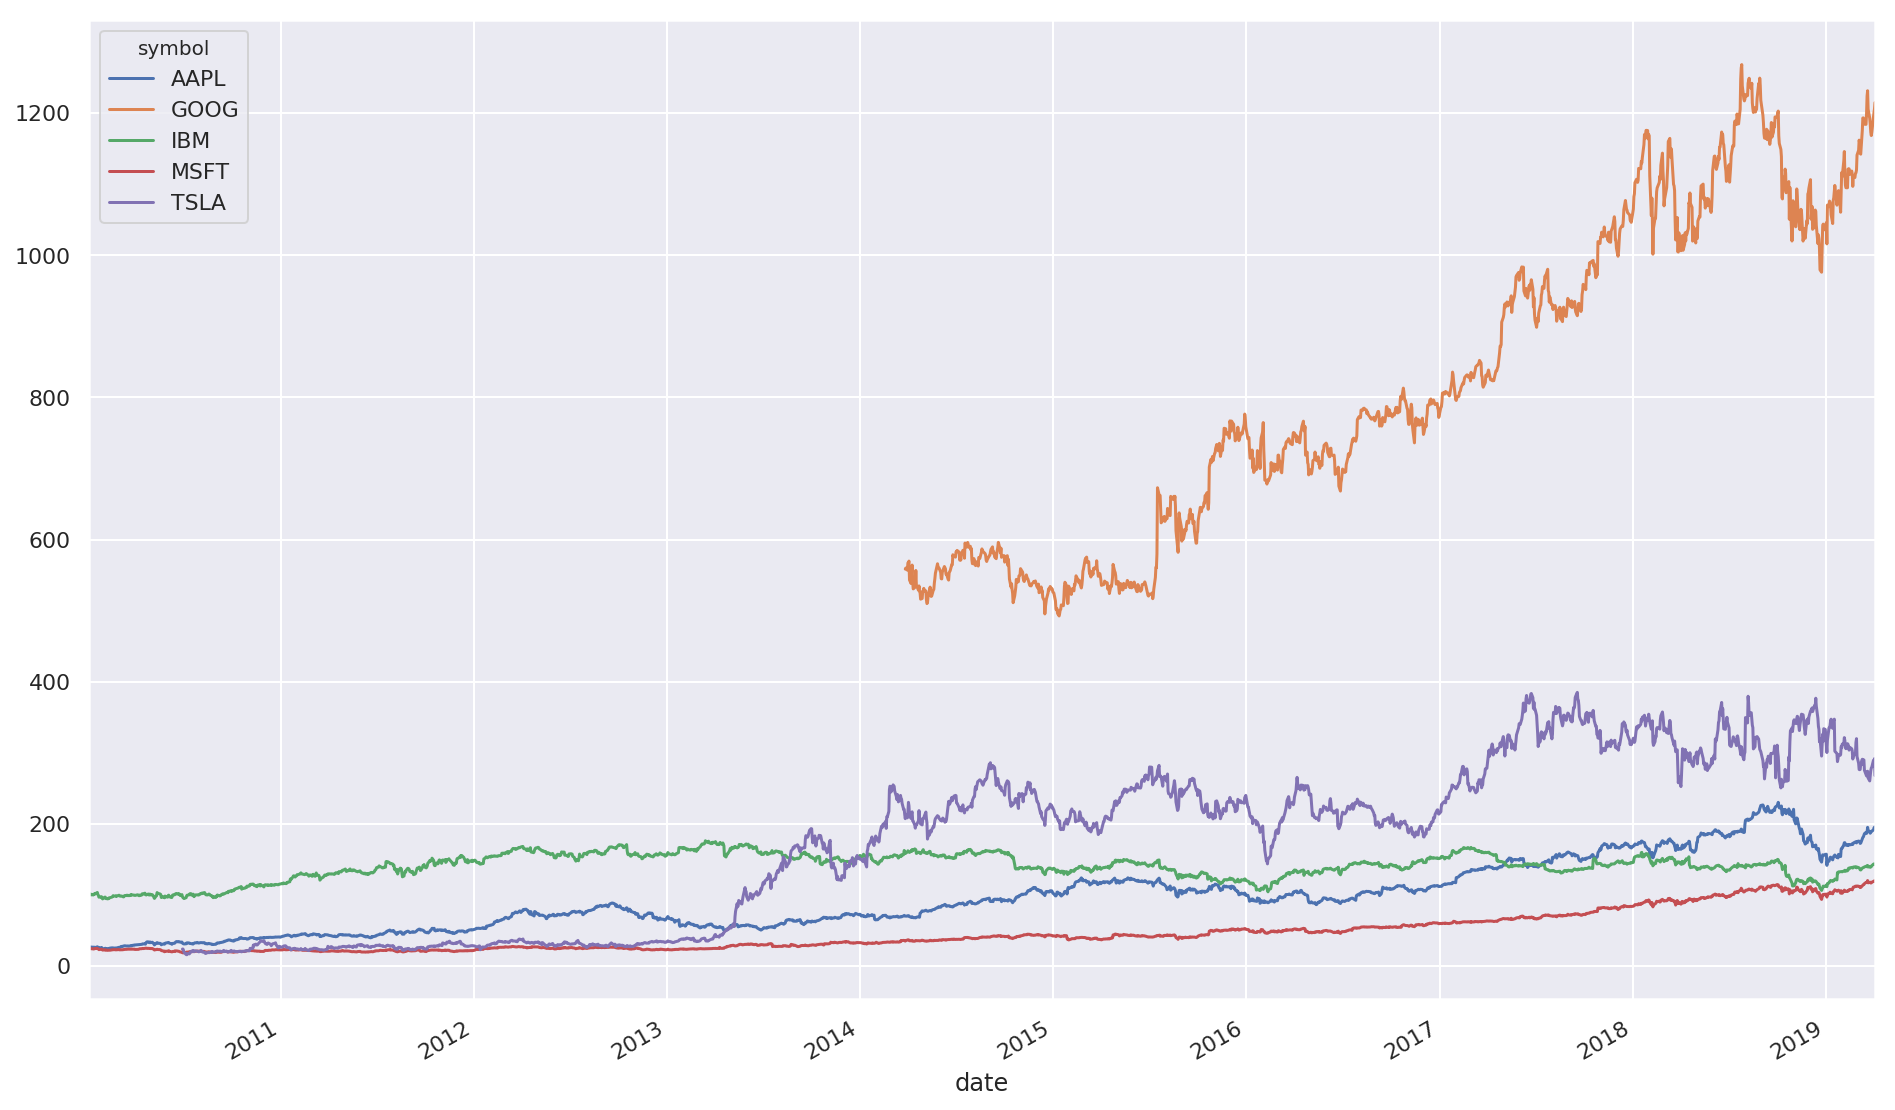

In [7]:
close_data.plot(figsize=(16, 10))

### Key concepts

- _Return_
<br>
$$R(S, t, t_0) = \dfrac{S_t - S_0}{S_0} = \dfrac{S_t}{S_0} - 1$$

- _Volatility_
<br>
$$\sigma = \sqrt{\frac{\sum\limits_{i=0}^t (S_i -\mu)^2}{t}}$$
<br>
Where stock $S_t$ is the price of the stock at time $t$ and $\mu$ is the mean return.

In [8]:
close_data.std()

symbol
AAPL     48.913524
GOOG    221.922967
IBM      18.559162
MSFT     26.978040
TSLA    115.483647
dtype: float64

## Indeces and ETFs


### Index
- An [index](https://www.investopedia.com/terms/i/index.asp) consists of a hypothetical portfolio of securities representing a particular market or a segment of it.
- Common examples: S&P500, FTSE100, Russell 2000, US Aggregate Bond Index.
- S&P500 is a commonly used benchmark for the stock market. It aggregates 500 of the largest US publicly traded companies weighted by market cap. It includes 75% of the total stocks traded in the US.

### ETF
- An [exchange traded fund](https://www.investopedia.com/terms/e/etf.asp) is is a marketable security that tracks a stock index, a commodity, bonds, or a basket of assets.
- Benefits: Low fees, lower taxes.
- They allow investors to trade a portfolio of stocks with lower capital margin.
- Common examples: SPDR (_Spider_, tracks S&P500), VOO (Vanguard S&P500 Index Fund), iShares Russell 2000, BLV (Vanguard Long-Term Bond)

## 2. Options

From [Investopedia](https://www.investopedia.com/terms/o/option.asp)

- Options are financial derivatives that give buyers the right, but not obligation, to buy or sell an underlying asset at an agreed upon price during a certain period of time.
- Two exercise types: _European_ (may exercise **at** expiration) and _American_ (may exercise at any moment **prior** to expiration)
- Basic options come in two types: _Calls_ and _Puts_
- Call options and put options form the basis for a wide range of option strategies designed for hedging, protection, or speculation.

Option contracts specify the following parts:

$S$ - Underlying asset  
$K$ - Strike price  
$Expiration$ - Days to expiration (dte)  
$Price$ - Price of the option, also called **premium**

### Key concepts

- **OTM**, Out of the money : $K < S_t$ for puts, $K > S_t$ for calls
- **ATM**, At the money : When $K \approx S_t$
- **ITM**, In the money : $K > S_t$ for puts, $K < S_t$ for calls

### Calls

- Give the bearer the right to _buy_ the underlying asset at a given date for an agreed upon price.
- Can be thought of as an insurance against _asset price increases_.
<br>
<br>
$$\text{Payoff} \equiv max(S_t - K, 0)$$
<br>
$$\text{Profit} \equiv max(S_t - K, 0) - C(K, t, t_0)$$
<br>
Where $S_t$ is the price of the asset at the day of expiration $t$ and $C(K, t, t_0)$ is the premium payed for the call purchased at time $t_0$ with strike price $K$.

In [9]:
def call(K, S_t, C):
    return np.maximum(S_t - K, 0) - C

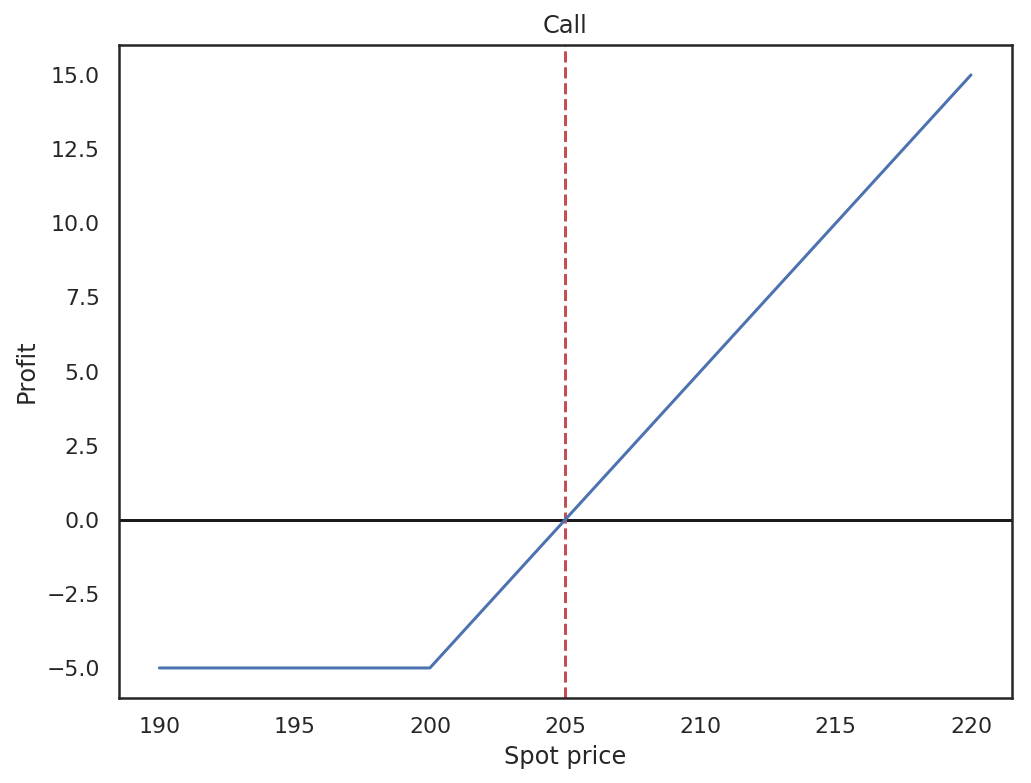

In [10]:
C = 5
K = 200
S_t = np.linspace(190, 220, num=100)

with sns.axes_style("white"):
    _fig, ax = plt.subplots(figsize=(8, 6))
    ax.axhline(y=0, color="k")
    ax.axvline(x=K+C, color="r", linestyle="--")
    ax.set(xlabel="Spot price", ylabel="Profit")
    sns.lineplot(x=S_t, y=call(K, S_t, C), ax=ax).set_title("Call")

### Puts
- Give the bearer the right to _sell_ the underlying asset at a given date for an agreed upon price.
- Can be thought of as an insurance against _asset price decreases_.
<br>
<br>
$$\text{Payoff} \equiv max(K - S_t, 0)$$
<br>
$$\text{Profit} \equiv max(K - S_t, 0) - P(K, t, t_0)$$
<br>
Where $S_t$ is the price of the asset at the day of expiration $t$ and $P(K, t, t_0)$ is the premium payed for the put purchased at time $t_0$ with strike price $K$.

In [11]:
def put(K, S_t, P):
    return np.maximum(K - S_t, 0) - P

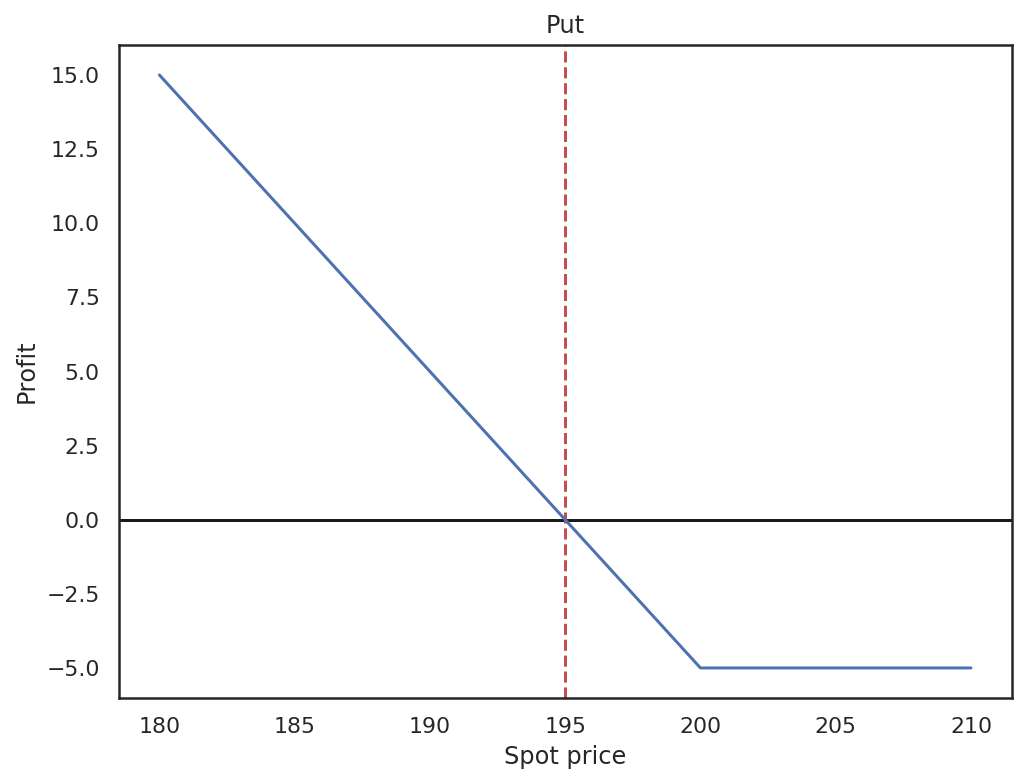

In [12]:
P = 5
K = 200
S_t = np.linspace(180, 210, num=100)

with sns.axes_style("white"):
    _fig, ax = plt.subplots(figsize=(8, 6))
    ax.axhline(y=0, color="k")
    ax.axvline(x=K-P, color="r", linestyle="--")
    ax.set(xlabel="Spot price", ylabel="Profit")
    sns.lineplot(x=S_t, y=put(K, S_t, P), ax=ax).set_title("Put")

In [13]:
options_data = pd.read_hdf("../data/options_data_v2.h5", key="/SPX", where="quotedate>2017 & quotedate<2018")

In [14]:
options_data.head()

,underlying,underlying_last,exchange,optionroot,optionext,type,expiration,quotedate,strike,last,bid,ask,volume,openinterest,impliedvol,delta,gamma,theta,vega,optionalias
13328880,SPX,2257.83,*,SPX170120C00100000,NaN,call,2017-01-20,2017-01-03,100.0,2161.50,2154.3,2158.7,0,5615,0.1214,1.0,0.0,-1.0239,0.0,SPX170120C00100000
13328881,SPX,2257.83,*,SPX170120C00200000,NaN,call,2017-01-20,2017-01-03,200.0,2060.95,2054.4,2058.8,0,6355,0.1214,1.0,0.0,-2.0479,0.0,SPX170120C00200000
13328882,SPX,2257.83,*,SPX170120C00300000,NaN,call,2017-01-20,2017-01-03,300.0,1960.45,1954.4,1958.8,0,2000,0.1214,1.0,0.0,-3.0718,0.0,SPX170120C00300000
13328883,SPX,2257.83,*,SPX170120C00400000,NaN,call,2017-01-20,2017-01-03,400.0,1760.55,1854.6,1858.9,0,25,0.1214,1.0,0.0,-4.0957,0.0,SPX170120C00400000
13328884,SPX,2257.83,*,SPX170120C00500000,NaN,call,2017-01-20,2017-01-03,500.0,1749.33,1754.6,1758.9,0,3813,0.1214,1.0,0.0,-5.1197,0.0,SPX170120C00500000


- `optionroot` is the name of the contract (think `id`)
- `underlying_last` is the last seen price for the underlying
- `type` either call or put
- `strike` is the strike price
- `bid` price offered by the market maker for the contract
- `ask` price wanted by the market maker for the contract
- `volume` the number of contracts traded that day
- `openinterest` the total number of contracts open since it started trading

Text(0.5, 1.0, 'Number of option contracts')

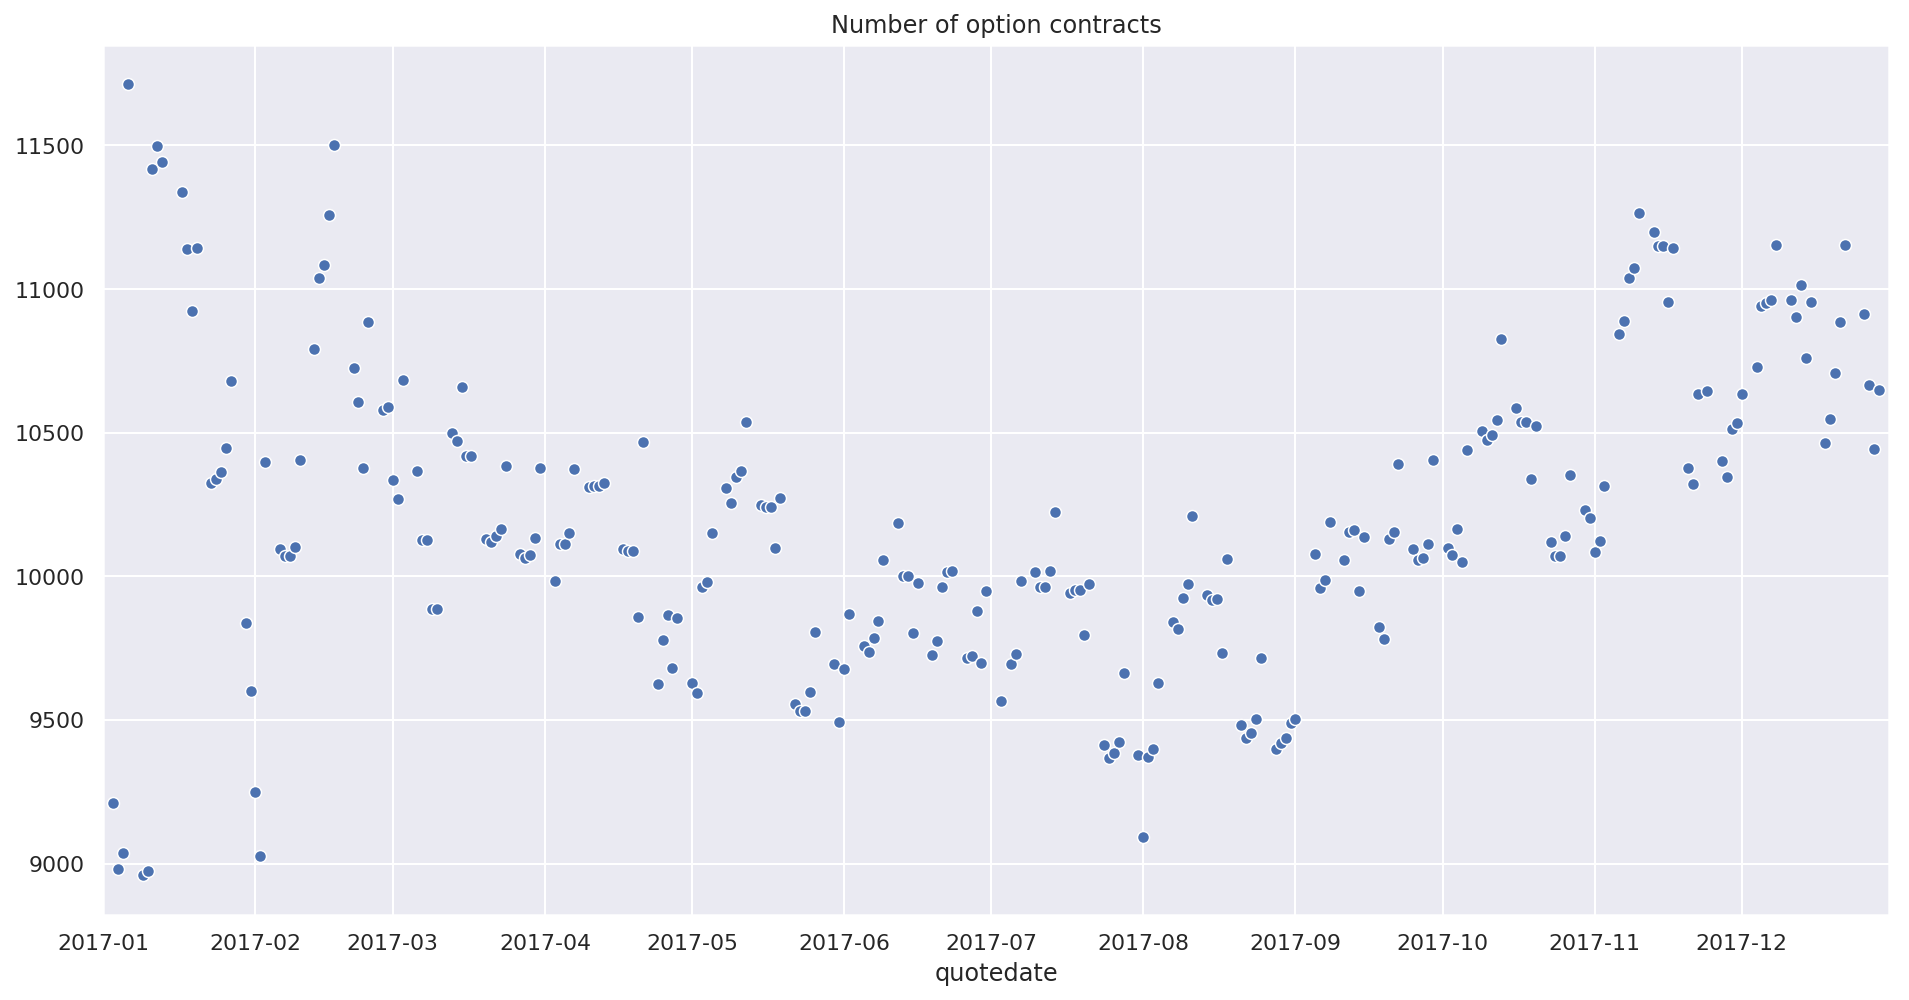

In [15]:
contracts = options_data.groupby("quotedate").size()
_fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim([pd.Timestamp(2017, 1, 1), pd.Timestamp(2017, 12, 31)])
sns.scatterplot(x=contracts.index, y=contracts, ax=ax).set_title("Number of option contracts")

## Options pricing

Options and financial derivatives in general are notoriously difficult to price.  
They are related to the volatility of the underlying; that is, options for _low volatility_ assets are _less expensive_ than their counterparts, all else being equal.
They also suffer time decay. As they approach expiration, OTM options tend to 0 and ATM and ITM options tend to $S_t$.

## VIX index

Market volatility is measured by the [CBOE VIX index](https://www.investopedia.com/articles/active-trading/070213/tracking-volatility-how-vix-calculated.asp).
It's a benchmark index designed specifically to track S&P 500 volatility.  
Calculates volatility by averaging the weighted prices of OTM puts and calls using options that expire in 16 and 44 days.

$$\text{VIX} = 100 * \sigma$$

In [16]:
vix = pd.read_csv("../data/vix_data.csv", parse_dates=["Date"], index_col="Date")

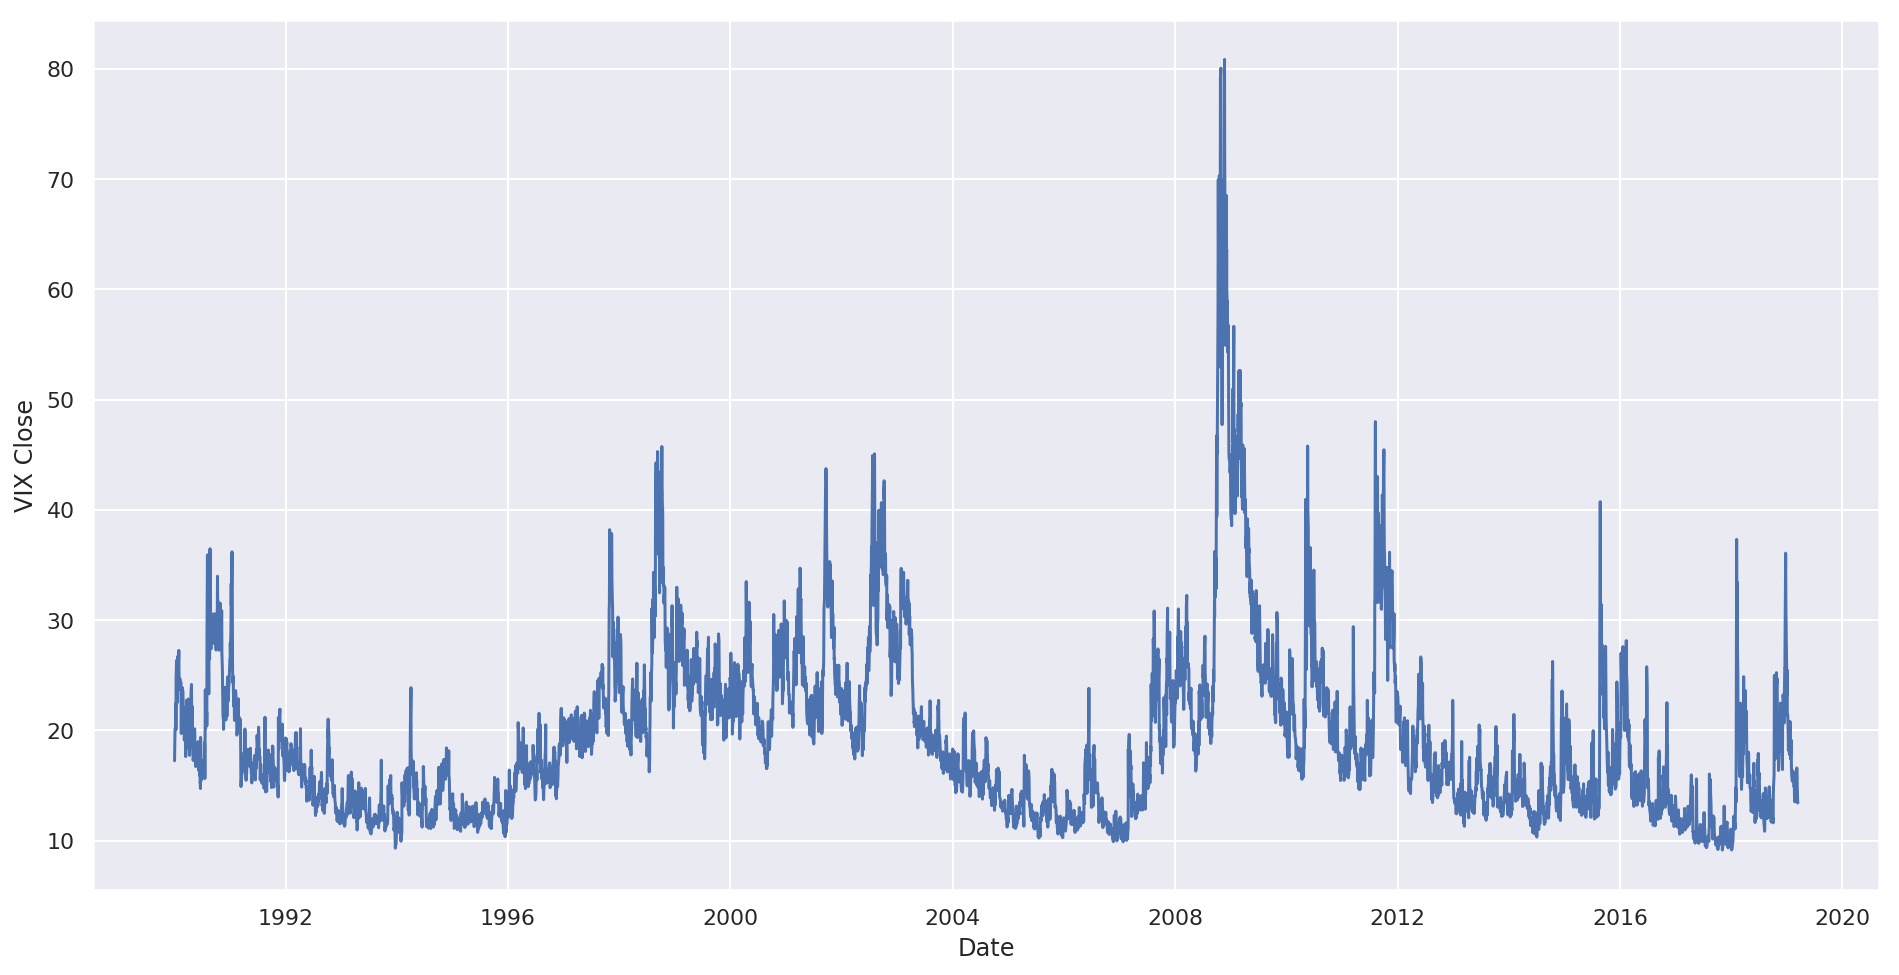

In [17]:
_fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=vix.index, y="VIX Close", data=vix, ax=ax)

In [18]:
spx_data = pd.read_csv("../data/SPX_1990-2018.csv", parse_dates=["date"], index_col="date")
spx_data.head()

,price
date,
1990-01-02,359.69
1990-01-03,358.76
1990-01-04,355.66
1990-01-05,352.20
1990-01-08,353.79


Text(0, 0.5, 'Level')

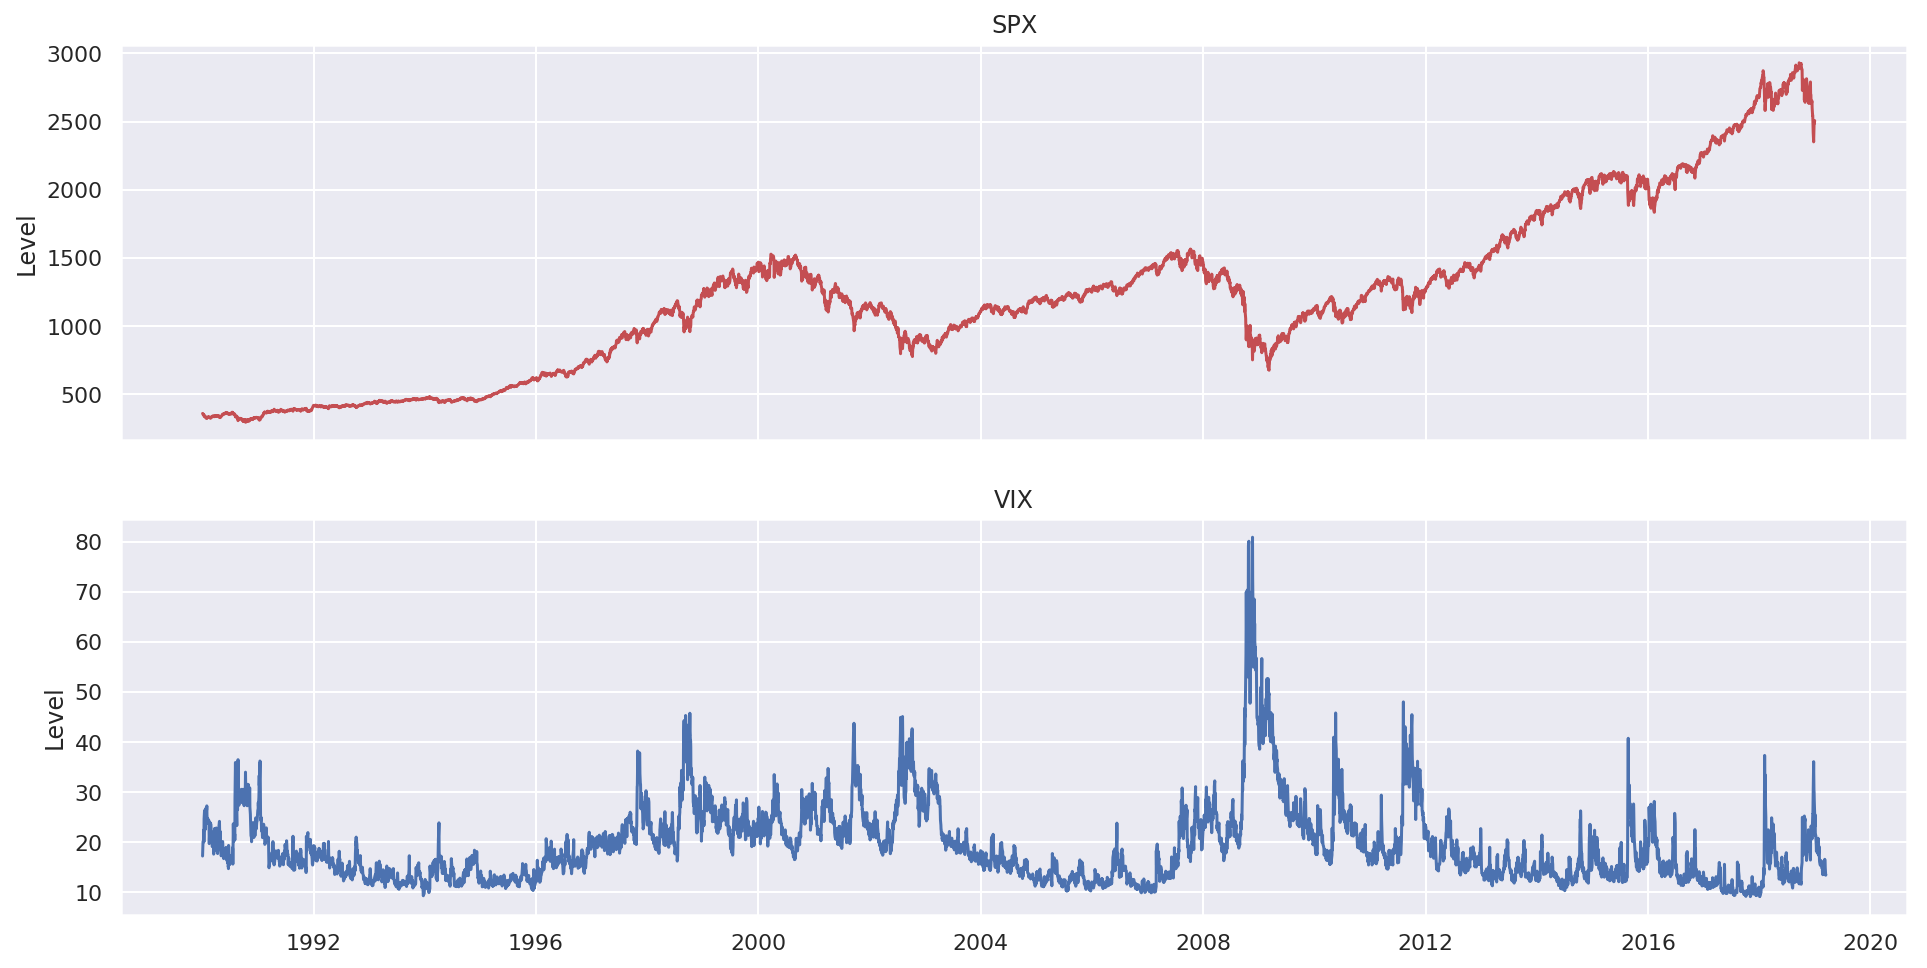

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8))
ax1.plot(spx_data.index, spx_data["price"], color="r")
ax1.set_title("SPX")
ax1.set_ylabel("Level")
ax2.plot(vix.index, vix["VIX Close"], color="b")
ax2.set_title("VIX")
ax2.set_ylabel("Level")

## Option combinations

- Options trading strategies involve buying and selling a combination of options.
- Common ones include: straddles, strangles, calendar spreads, butterflies, condors

### Straddle (Long)

- Buy $n$ calls and $n$ puts with the same expiration and strike price close to the underlying's spot price
- This strategy is direction indifferent, the trader expects movement in the underlying but is indifferent as to whether that movement is up or down.
- This is an example of being _long volatility_. The trader is _buying volatility_.
<br>
<br>
$$\text{Profit} \equiv max(K - S_t, S_t - K, 0) - P(K, t, t_0) - C(K, t, t_0)$$

In [20]:
def straddle(K, S_t, C, P):
    call_profit = np.maximum(S_t - K, 0)
    put_profit = np.maximum(K - S_t, 0)
    return np.maximum(call_profit, put_profit) - P - C

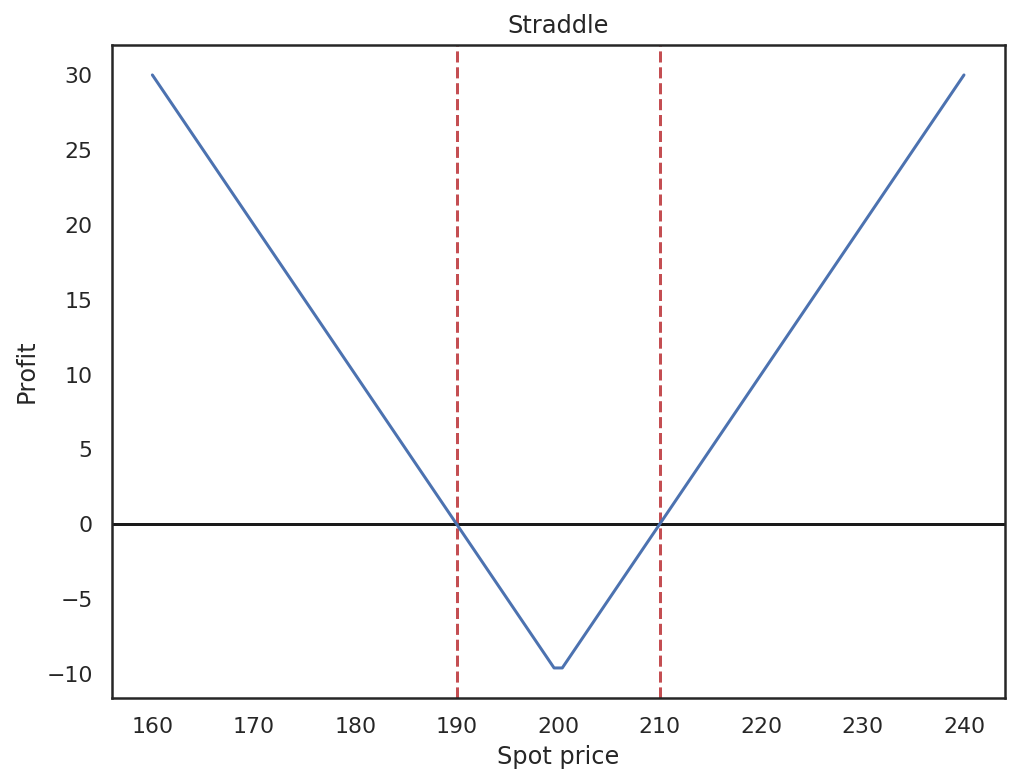

In [21]:
C = 5
P = 5
K = 200
S_t = np.linspace(160, 240, num=100)

with sns.axes_style("white"):
    _fig, ax = plt.subplots(figsize=(8, 6))
    ax.axhline(y=0, color="k")
    ax.axvline(x=K-P-C, color="r", linestyle="--")
    ax.axvline(x=K+P+C, color="r", linestyle="--")
    ax.set(xlabel="Spot price", ylabel="Profit")
    sns.lineplot(x=S_t, y=straddle(K, S_t, C, P), ax=ax).set_title("Straddle")

In the folloing chart, we buy straddles on SPX using options with 60 dte (with a tolerance level of 10%) and exit the trade 2 days before expiration.

![straddle](img/straddle_profits.png)